<a href="https://colab.research.google.com/github/dhruvgupta-24/Cognitive-Computing/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.  Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctua on using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribu on (excluding stopwords).

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
# nltk.download('punkt_tab')
# nltk.download('stopwords')

text = """Technology fascinates me because it constantly evolves and shapes the future. From smartphones to artificial intelligence, every innovation aims to simplify human life. The rapid development of cloud computing and machine learning has transformed industries worldwide. I enjoy learning about new gadgets and software trends that enhance productivity. Exploring technological breakthroughs opens doors to limitless possibilities."""

clean_text = re.sub(r'[^\w\s]', '', text.lower())

sent_tokens = sent_tokenize(clean_text)
word_tokens = word_tokenize(clean_text)

split_words = clean_text.split()
print("Split() Output:", split_words)
print("word_tokenize() Output:", word_tokens)

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word not in stop_words]

freq_dist = Counter(filtered_words)
print("Word Frequency Distribution:", freq_dist)

Split() Output: ['technology', 'fascinates', 'me', 'because', 'it', 'constantly', 'evolves', 'and', 'shapes', 'the', 'future', 'from', 'smartphones', 'to', 'artificial', 'intelligence', 'every', 'innovation', 'aims', 'to', 'simplify', 'human', 'life', 'the', 'rapid', 'development', 'of', 'cloud', 'computing', 'and', 'machine', 'learning', 'has', 'transformed', 'industries', 'worldwide', 'i', 'enjoy', 'learning', 'about', 'new', 'gadgets', 'and', 'software', 'trends', 'that', 'enhance', 'productivity', 'exploring', 'technological', 'breakthroughs', 'opens', 'doors', 'to', 'limitless', 'possibilities']
word_tokenize() Output: ['technology', 'fascinates', 'me', 'because', 'it', 'constantly', 'evolves', 'and', 'shapes', 'the', 'future', 'from', 'smartphones', 'to', 'artificial', 'intelligence', 'every', 'innovation', 'aims', 'to', 'simplify', 'human', 'life', 'the', 'rapid', 'development', 'of', 'cloud', 'computing', 'and', 'machine', 'learning', 'has', 'transformed', 'industries', 'worldw

Q2. Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemma za on with WordNetLemma zer
5. Compare the stemmed and lemma zed outputs and explain when you’d prefer one over
the other.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

text = """Technology fascinates me because it constantly evolves and shapes the future. From smartphones to artificial intelligence, every innovation aims to simplify human life. The rapid development of cloud computing and machine learning has transformed industries worldwide. I enjoy learning about new gadgets and software trends that enhance productivity. Exploring technological breakthroughs opens doors to limitless possibilities."""

alpha_words = re.findall(r'\b[a-zA-Z]+\b', text.lower())

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in alpha_words if word not in stop_words]

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

print("Stemmed Words:\n", stemmed_words)
print("\nLemmatized Words:\n", lemmatized_words)

Stemmed Words:
 ['technolog', 'fascin', 'constantli', 'evolv', 'shape', 'futur', 'smartphon', 'artifici', 'intellig', 'everi', 'innov', 'aim', 'simplifi', 'human', 'life', 'rapid', 'develop', 'cloud', 'comput', 'machin', 'learn', 'transform', 'industri', 'worldwid', 'enjoy', 'learn', 'new', 'gadget', 'softwar', 'trend', 'enhanc', 'product', 'explor', 'technolog', 'breakthrough', 'open', 'door', 'limitless', 'possibl']

Lemmatized Words:
 ['technology', 'fascinates', 'constantly', 'evolves', 'shape', 'future', 'smartphones', 'artificial', 'intelligence', 'every', 'innovation', 'aim', 'simplify', 'human', 'life', 'rapid', 'development', 'cloud', 'computing', 'machine', 'learning', 'transformed', 'industry', 'worldwide', 'enjoy', 'learning', 'new', 'gadget', 'software', 'trend', 'enhance', 'productivity', 'exploring', 'technological', 'breakthrough', 'open', 'door', 'limitless', 'possibility']


Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representa on.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

texts = [
    "New AI tools are transforming the tech industry.",
    "The smartphone market sees record sales this year.",
    "Cloud computing continues to drive business growth worldwide."
]

count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(texts)
print("Bag of Words Matrix:\n", bow_matrix.toarray())
print("Feature Names:\n", count_vectorizer.get_feature_names_out())

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
feature_names = tfidf_vectorizer.get_feature_names_out()

for i, row in enumerate(tfidf_matrix.toarray()):
    print(f"\nText {i+1} Top Keywords:")
    sorted_indices = np.argsort(row)[::-1]
    for idx in sorted_indices[:3]:
        print(f"{feature_names[idx]}: {row[idx]:.4f}")

Bag of Words Matrix:
 [[1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1]
 [0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]]
Feature Names:
 ['ai' 'are' 'business' 'cloud' 'computing' 'continues' 'drive' 'growth'
 'industry' 'market' 'new' 'record' 'sales' 'sees' 'smartphone' 'tech'
 'the' 'this' 'to' 'tools' 'transforming' 'worldwide' 'year']

Text 1 Top Keywords:
transforming: 0.3633
tools: 0.3633
ai: 0.3633

Text 2 Top Keywords:
year: 0.3633
this: 0.3633
market: 0.3633

Text 3 Top Keywords:
worldwide: 0.3536
to: 0.3536
drive: 0.3536


Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:
a. Jaccard Similarity using sets
b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
c. Analyze which similarity metric gives be er insights in your case.

In [ ]:
text1 = """Artificial Intelligence enables machines to learn from data and make decisions.
It powers technologies like self-driving cars, voice assistants, and smart recommendations."""

text2 = """Blockchain is a secure digital ledger that stores data across decentralized networks.
It is used in cryptocurrency, smart contracts, and ensuring data integrity."""

text1_clean = re.sub(r'[^\w\s]', '', text1.lower())
text2_clean = re.sub(r'[^\w\s]', '', text2.lower())

tokens1 = set(word_tokenize(text1_clean))
tokens2 = set(word_tokenize(text2_clean))

tokens1 = {word for word in tokens1 if word not in stop_words}
tokens2 = {word for word in tokens2 if word not in stop_words}

jaccard_sim = len(tokens1.intersection(tokens2)) / len(tokens1.union(tokens2))
print(f"Jaccard Similarity: {jaccard_sim:.4f}")

from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform([text1, text2])
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
print(f"Cosine Similarity: {cos_sim:.4f}")

Jaccard Similarity: 0.0667
Cosine Similarity: 0.0966


Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjec vity for each review.
2. Classify reviews into Posi ve / Nega ve / Neutral.
3. Create a word cloud using the wordcloud library for all posi ve reviews.

Sentence: I recently bought the new Bluetooth headphones, and the sound quality is fantastic! The battery lasts for hours, and they are super comfortable
Polarity: 0.2949494949494949, Subjectivity: 0.5785353535353535
Sentiment: Positive

Sentence: However, the Bluetooth connection sometimes drops unexpectedly
Polarity: 0.1, Subjectivity: 1.0
Sentiment: Positive

Sentence: Overall, it's a great product for the price
Polarity: 0.4, Subjectivity: 0.375
Sentiment: Positive



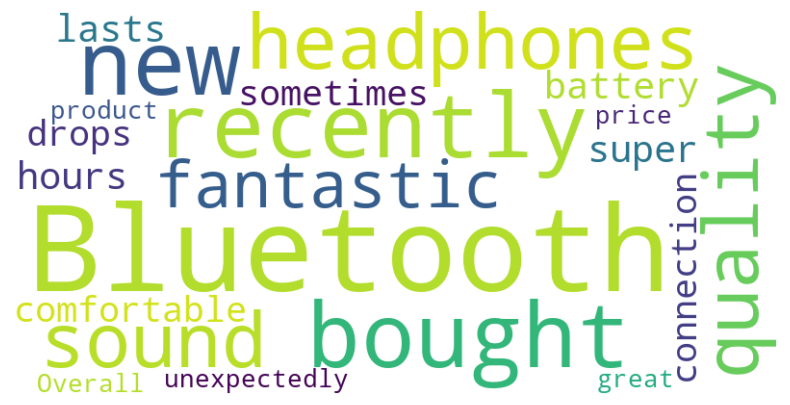

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

review = "I recently bought the new Bluetooth headphones, and the sound quality is fantastic! The battery lasts for hours, and they are super comfortable. However, the Bluetooth connection sometimes drops unexpectedly. Overall, it's a great product for the price."

sentences = review.split('.')

for sentence in sentences:
    if sentence.strip():
        analysis = TextBlob(sentence.strip())
        polarity = analysis.polarity
        subjectivity = analysis.subjectivity
        print(f"Sentence: {sentence.strip()}")
        print(f"Polarity: {polarity}, Subjectivity: {subjectivity}")
        if polarity > 0:
            sentiment = "Positive"
        elif polarity < 0:
            sentiment = "Negative"
        else:
            sentiment = "Neutral"
        print(f"Sentiment: {sentiment}\n")

positive_reviews = ' '.join([sentence.strip() for sentence in sentences if TextBlob(sentence.strip()).polarity > 0])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starting from any seed word you
provide.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np

# Sample paragraph
train_text = "Deep learning is a subset of machine learning that uses neural networks to learn from data and make predictions."

# 1. Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([train_text])
total_words = len(tokenizer.word_index) + 1
input_sequences = []

# 2. Create input sequences
tokens = tokenizer.texts_to_sequences([train_text])[0]
for i in range(1, len(tokens)):
    seq = tokens[:i+1]
    input_sequences.append(seq)

# Pad sequences
max_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = np.array(y)

# 3. Simple model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_len-1))
model.add(LSTM(50))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=500, verbose=0)

# Text generation
seed = "deep"
next_words = 7
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed += " " + output_word

print("Generated Text:", seed)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Generated Text: deep learning is a subset of machine learning
